# ML derived from scratch

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import graphviz # may need to install graphviz locally as well https://www.graphviz.org/download/

### Simple one node model

Say you know the temperature in celsius $c$ and want to predict temperature in farhenheit $f$.

We know this is a linear relationship and can be modeled as:

$ f = 32 + \frac{9}{5} c$

We can rewrite this as:

$ y = b + w \cdot x$

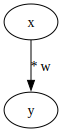

In [23]:
dot = graphviz.Digraph(comment='One neuron')

dot.node("x")
dot.node("y")
dot.edge("x", "y", "* w")
dot


### Multiple nodes

Now if we want to use multiple nodes, we can use linear algebra and the equations remain the same. Now we are just doing the calculation along every edge. So **all** of the inputs have some *weight* on the new corresponding value.

$ \vec{y} = W \cdot \vec{x} + \vec{b} $

Each node contains a value. Each edge contains a weight.

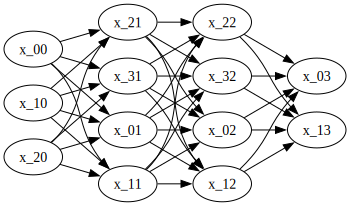

In [26]:
dot = graphviz.Digraph(comment='One neuron')

layers = [3, 4, 4, 2]

dot.graph_attr['rankdir'] = "LR"

for i in range(len(layers) - 1):
	for j in range(layers[i]):
		if j == 0:
			dot.node(f'x_{j}{i}')
		for k in range(layers[i+1]):
			dot.node(f'x_{k}{i+1}')
			dot.edge(f'x_{j}{i}', f'x_{k}{i+1}')
dot

### Adding nonlinearity

Many times, relationship between data are not linear--cannot be represented by straightforward linear relationships. We add these nonlinear functions to take these vague relationships into consideration.

$\vec{y} = f(W \cdot \vec{x} + \vec{b})$

For example, this can be a nonlinear function like relu.

$ f(x) = \begin{cases} x \quad x > 0 \\ 0 \quad o.w. \end{cases}$

## Loss function

There are many loss functions. They serve the purpose of telling you how your model is doing.

The common introductory loss function is the mean-squared-error (MSE).

$MSE = \frac{1}{N}\sum^N (y_i - y'_i)^2$

$Logistic Regression = - \frac{1}{N} \sum^N y'_i log(y_i) + (1-y'_i) log(y_i) + \frac{\lambda}{2 N} \sum^N ..$

### Backpropagation

Landmark paper by Hinton outlining backprop.

https://www.nature.com/articles/323533a0.pdf

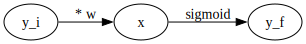

In [30]:
dot = graphviz.Digraph(comment='One neuron')

dot.graph_attr['rankdir'] = 'LR'
dot.node("y_i")
dot.node("x")
dot.edge("y_i", "x", "* w")
dot.edge("x", "y_f", "sigmoid")
dot.node("y_f")

dot

The forward propagation is:

$x = w \cdot y_i$

$y_f = \frac{1}{1+e^{-x}}$

Not doing bias for now

Basically

$$y = \frac{1}{1 + e^{-x}}$$
$$\frac{dy}{dx} = \frac{-1}{(1 + e^{-x})^2} \cdot -e^{-x} = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} = y (1-y)$$

$ E = \frac{1}{2} (y - d)^2 \quad$
We put one half so the math is cleaner.

$\frac{\partial E}{\partial y} = y - d \quad$ good ol' calculus

$ \frac{\partial E}{\partial x} = \frac{\partial E}{\partial y} \cdot \frac{dy}{dx} \quad $ [Chain rule](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/14%3A_Differentiation_of_Functions_of_Several_Variables/14.05%3A_The_Chain_Rule_for_Multivariable_Functions)


$ \frac{\partial E}{\partial x} = \frac{\partial E}{\partial y} \cdot y(1-y) \quad $

$ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial x} \cdot \frac{\partial x}{\partial w} = \frac{\partial E}{\partial x} y \quad $ Chain rule again

We've attained $\frac{\partial E}{\partial w}$ which is very valuable! This tells us the gradient which is both direction and step length in which we should take.

$\Delta w = - \epsilon \frac{\partial E}{\partial w}$

or using alpha learning

$\Delta w (t) = - \epsilon \frac{\partial E}{\partial w} + \alpha \Delta w(t-1) $


We can extrapolate the same underlying logic to multi-layered perpectrons

#### In Multidimensions

$\nabla_w E $

### Momentum

Skip connections